<a href="https://colab.research.google.com/github/LeoHanSung/SinChon8/blob/master/hansung/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hansung/corona.ipynb

In [0]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [43]:
print(patientDF.columns.values)

['patient_id' 'sex' 'birth_year' 'country' 'region' 'disease' 'group'
 'infection_reason' 'infection_order' 'infected_by' 'contact_number'
 'confirmed_date' 'released_date' 'deceased_date' 'state']


In [88]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

patientDF = pd.read_csv('/content/gdrive/My Drive/SinChon8/kaggle/Corona/patient.csv')

# sex, region, disease, infection_reason, infection_order, infected_by, contact_number, 

patientDF.head(200)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,male,1996.0,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-21,NaN,NaN,isolated
196,197,female,1960.0,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-21,NaN,NaN,isolated
197,198,female,1978.0,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-21,NaN,NaN,isolated
198,199,female,1969.0,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-21,NaN,NaN,isolated


In [89]:
patientDF.count()

patient_id          7869
sex                  679
birth_year           666
country             7869
region               437
disease               28
group                 86
infection_reason     154
infection_order       36
infected_by           70
contact_number        53
confirmed_date      7869
released_date         56
deceased_date         36
state               7869
dtype: int64

In [90]:
patientDF.isna().sum()

patient_id             0
sex                 7190
birth_year          7203
country                0
region              7432
disease             7841
group               7783
infection_reason    7715
infection_order     7833
infected_by         7799
contact_number      7816
confirmed_date         0
released_date       7813
deceased_date       7833
state                  0
dtype: int64

In [91]:
patientDF.shape

(7869, 15)

In [92]:
patientDF.describe()

,patient_id,birth_year,disease,infection_order,infected_by,contact_number
count,7869.000000,666.000000,28.0,36.000000,70.000000,53.000000
mean,3935.000000,1974.271772,1.0,4.277778,379.000000,67.849057
std,2271.728967,17.423250,0.0,12.032364,540.247528,177.723575
min,1.000000,1929.000000,1.0,1.000000,3.000000,0.000000
25%,1968.000000,1962.000000,1.0,1.000000,29.250000,3.000000
50%,3935.000000,1974.000000,1.0,2.000000,126.000000,17.000000
75%,5902.000000,1990.000000,1.0,3.000000,563.250000,45.000000
max,7869.000000,2018.000000,1.0,74.000000,2621.000000,1160.000000


In [107]:
patientDF.corr()

,patient_id,birth_year,disease,infection_order,infected_by,contact_number
patient_id,1.000000,-0.034748,NaN,0.996446,0.721973,-0.127992
birth_year,-0.034748,1.000000,NaN,-0.028862,0.102124,-0.170023
disease,NaN,NaN,NaN,NaN,NaN,NaN
infection_order,0.996446,-0.028862,NaN,1.000000,0.575657,0.007543
infected_by,0.721973,0.102124,NaN,0.575657,1.000000,0.057415
contact_number,-0.127992,-0.170023,NaN,0.007543,0.057415,1.000000


In [93]:
patientDF.describe(include='all')

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
count,7869.000000,679,666.000000,7869,437,28.0,86,154,36.000000,70.000000,53.000000,7869,56,36,7869
unique,NaN,2,NaN,3,14,NaN,4,14,NaN,NaN,NaN,37,21,16,3
top,NaN,female,NaN,Korea,capital area,NaN,Shincheonji Church,contact with patient,NaN,NaN,NaN,2020-03-01,2020-03-04,2020-03-05,isolated
freq,NaN,393,NaN,7860,191,NaN,58,76,NaN,NaN,NaN,1062,11,6,7777
mean,3935.000000,NaN,1974.271772,NaN,NaN,1.0,NaN,NaN,4.277778,379.000000,67.849057,NaN,NaN,NaN,NaN
std,2271.728967,NaN,17.423250,NaN,NaN,0.0,NaN,NaN,12.032364,540.247528,177.723575,NaN,NaN,NaN,NaN
min,1.000000,NaN,1929.000000,NaN,NaN,1.0,NaN,NaN,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
25%,1968.000000,NaN,1962.000000,NaN,NaN,1.0,NaN,NaN,1.000000,29.250000,3.000000,NaN,NaN,NaN,NaN
50%,3935.000000,NaN,1974.000000,NaN,NaN,1.0,NaN,NaN,2.000000,126.000000,17.000000,NaN,NaN,NaN,NaN
75%,5902.000000,NaN,1990.000000,NaN,NaN,1.0,NaN,NaN,3.000000,563.250000,45.000000,NaN,NaN,NaN,NaN


In [94]:
patientDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7869 entries, 0 to 7868
Data columns (total 15 columns):
patient_id          7869 non-null int64
sex                 679 non-null object
birth_year          666 non-null float64
country             7869 non-null object
region              437 non-null object
disease             28 non-null float64
group               86 non-null object
infection_reason    154 non-null object
infection_order     36 non-null float64
infected_by         70 non-null float64
contact_number      53 non-null float64
confirmed_date      7869 non-null object
released_date       56 non-null object
deceased_date       36 non-null object
state               7869 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 922.3+ KB


In [95]:
patientDF['sex'].dropna()

0       female
1         male
2         male
3         male
4         male
         ...  
5580      male
5766      male
5767    female
6284    female
7195      male
Name: sex, Length: 679, dtype: object

In [96]:
patientDF.dropna(subset = ['sex'])

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,5581,male,2013.0,Korea,capital area,NaN,NaN,contact with patient,NaN,NaN,NaN,2020-03-04,NaN,NaN,isolated
5766,5767,male,1938.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
5767,5768,female,1935.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
6284,6285,female,1929.0,Korea,Gyeongsangbuk-do,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06,NaN,2020-03-04,deceased


In [0]:
patientDF.loc[patientDF.sex=='male', 'sex'] = '1'
patientDF.loc[patientDF.sex=='female', 'sex'] = '2'

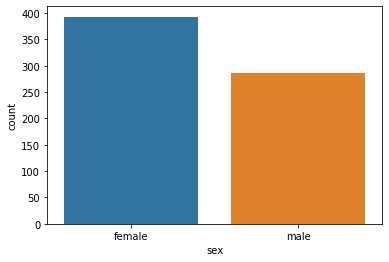

In [97]:
sns.countplot(patientDF['sex'])
plt.show()

In [104]:
patientDF['infection_reason']

154

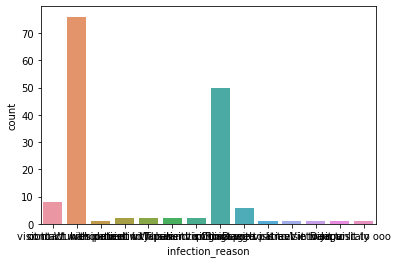

In [100]:
sns.countplot(patientDF['infection_reason'])
plt.show()

TypeError: ignored

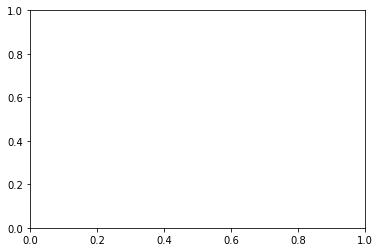

In [80]:
fig, ax  = plt.subplots(1,1)
patientDF['sex'].plot(kind='bar')

In [0]:
routeDF = pd.read_csv('/content/gdrive/My Drive/SinChon8/kaggle/Corona/time.csv')

routeDF.head(20)

,date,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,16,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,16,22,21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,16,27,25,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5,2020-01-25,16,27,25,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
6,2020-01-26,16,51,47,3,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
7,2020-01-27,16,61,56,4,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
8,2020-01-28,16,116,97,4,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
9,2020-01-29,16,187,155,4,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0


In [0]:
routeDF.isna().sum()

date                 0
time                 0
test                 0
negative             0
confirmed            0
released             0
deceased             0
Seoul                0
Busan                0
Daegu                0
Incheon              0
Gwangju              0
Daejeon              0
Ulsan                0
Sejong               0
Gyeonggi-do          0
Gangwon-do           0
Chungcheongbuk-do    0
Chungcheongnam-do    0
Jeollabuk-do         0
Jeollanam-do         0
Gyeongsangbuk-do     0
Gyeongsangnam-do     0
Jeju-do              0
dtype: int64

In [0]:
routeDF.isna().sum()

date                 0
time                 0
test                 0
negative             0
confirmed            0
released             0
deceased             0
Seoul                0
Busan                0
Daegu                0
Incheon              0
Gwangju              0
Daejeon              0
Ulsan                0
Sejong               0
Gyeonggi-do          0
Gangwon-do           0
Chungcheongbuk-do    0
Chungcheongnam-do    0
Jeollabuk-do         0
Jeollanam-do         0
Gyeongsangbuk-do     0
Gyeongsangnam-do     0
Jeju-do              0
dtype: int64

In [0]:
timeDF = pd.read_csv('/content/gdrive/My Drive/SinChon8/kaggle/Corona/time.csv')

timeDF.head(20)

,date,time,test,negative,confirmed,released,deceased,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Gyeonggi-do,Gangwon-do,Chungcheongbuk-do,Chungcheongnam-do,Jeollabuk-do,Jeollanam-do,Gyeongsangbuk-do,Gyeongsangnam-do,Jeju-do
0,2020-01-20,16,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-21,16,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-22,16,4,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-23,16,22,21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-24,16,27,25,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
5,2020-01-25,16,27,25,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
6,2020-01-26,16,51,47,3,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
7,2020-01-27,16,61,56,4,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
8,2020-01-28,16,116,97,4,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0
9,2020-01-29,16,187,155,4,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0


In [0]:
timeDF.count()

date                 53
time                 53
test                 53
negative             53
confirmed            53
released             53
deceased             53
Seoul                53
Busan                53
Daegu                53
Incheon              53
Gwangju              53
Daejeon              53
Ulsan                53
Sejong               53
Gyeonggi-do          53
Gangwon-do           53
Chungcheongbuk-do    53
Chungcheongnam-do    53
Jeollabuk-do         53
Jeollanam-do         53
Gyeongsangbuk-do     53
Gyeongsangnam-do     53
Jeju-do              53
dtype: int64

In [0]:
timeDF.isna().sum()

date                 0
time                 0
test                 0
negative             0
confirmed            0
released             0
deceased             0
Seoul                0
Busan                0
Daegu                0
Incheon              0
Gwangju              0
Daejeon              0
Ulsan                0
Sejong               0
Gyeonggi-do          0
Gangwon-do           0
Chungcheongbuk-do    0
Chungcheongnam-do    0
Jeollabuk-do         0
Jeollanam-do         0
Gyeongsangbuk-do     0
Gyeongsangnam-do     0
Jeju-do              0
dtype: int64

In [0]:
trendDF = pd.read_csv('/content/gdrive/My Drive/SinChon8/kaggle/Corona/trend.csv')

trendDF.head(20)

,date,cold,flu,pneumonia,coronavirus
0,2019-12-07,0.12408,0.24699,0.22144,0.01309
1,2019-12-08,0.11863,0.25390,0.19617,0.00836
2,2019-12-09,0.16308,0.47880,0.33180,0.01272
3,2019-12-10,0.13981,0.40789,0.30671,0.01881
4,2019-12-11,0.13972,0.39007,0.30299,0.01854
5,2019-12-12,0.13954,0.38226,0.30526,0.01990
6,2019-12-13,0.14217,0.44098,0.28344,0.01881
7,2019-12-14,0.11363,0.35898,0.21672,0.01499
8,2019-12-15,0.12445,0.35189,0.20381,0.01163
9,2019-12-16,0.16417,0.66434,0.33217,0.01536


In [0]:
trendDF.count()

date           96
cold           96
flu            96
pneumonia      96
coronavirus    96
dtype: int64

In [0]:
trendDF.isna().sum()

date           0
cold           0
flu            0
pneumonia      0
coronavirus    0
dtype: int64

In [0]:
caseDF = pd.read_csv('/content/gdrive/My Drive/SinChon8/kaggle/Corona/case.csv')

caseDF.head(20)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1,Seoul,Guro-gu,True,Guro-gu Call Center,70,37.508163,126.884387
1,2,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
2,3,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
3,4,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
4,5,Seoul,Dongdaemun-gu,True,Dongan Church,9,37.592888,127.056766
5,6,Seoul,Jung-gu,True,Jung-gu Fashion Company,7,37.562405,126.984377
6,7,Seoul,from other city,True,Shincheonji Church,6,-,-
7,8,Seoul,-,False,etc,46,-,-
8,9,Busan,Dongnae-gu,True,Onchun Church,34,35.21628,129.0771
9,10,Busan,from other city,True,Shincheonji Church,10,-,-


In [0]:
caseDF.count()

case_id           78
province          78
city              78
group             78
infection_case    78
confirmed         78
latitude          78
longitude         78
dtype: int64

In [0]:
caseDF.isna().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64